Mounting google drive, where the data is saved

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
import tensorflow as tf

## Load data

In [ ]:
# Load DataFrame back from HDF5 file
df = pd.read_hdf('/content/drive/My Drive/AI4EIC_hackathon/data_AI4EIC_Q1.h5', key='data_new')

df.head()

,eventID,PID,momentum,theta,phi,image
0,0.0,1,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1.0,1,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2.0,1,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3.0,0,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4.0,0,15.0,19.999999,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:

length = len(df)

images = np.stack(df['image'].to_numpy()).reshape(length,128,128)
print(images.shape)

labels = np.array(df["PID"]).reshape(length,1)
print(labels.shape)


(1000, 128, 128)
(1000, 1)


## Train Test Split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

## CNN Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=(3, 3), input_shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(filters = 32,kernel_size =(7,7),strides=(1, 1)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 1, activation='sigmoid')
    ])

model.compile(
  'adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 134, 134, 1)       0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      1600      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                        

## Traning the Model

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(16)
history = model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
57/57 [==============================] - 0s 8ms/step - loss: 7.1520e-05 - accuracy: 1.0000 - val_loss: 0.0540 - val_accuracy: 1.0000
Epoch 2/100
57/57 [==============================] - 0s 8ms/step - loss: 5.9620e-05 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 3/100
57/57 [==============================] - 0s 8ms/step - loss: 5.0755e-05 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 4/100
57/57 [==============================] - 0s 8ms/step - loss: 4.3829e-05 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 5/100
57/57 [==============================] - 0s 8ms/step - loss: 3.8286e-05 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/100
57/57 [==============================] - 0s 8ms/step - loss: 3.3767e-05 - accuracy: 1.0000 - val_loss: 6.4600e-04 - val_accuracy: 1.0000
Epoch 7/100
57/57 [==============================] - 0s 7ms/step - loss: 3.0024e-05 - accuracy: 1.0000 - val_loss: 2.9841e-04 

<ipython-input-17-7511973cf558>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
<ipython-input-17-7511973cf558>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

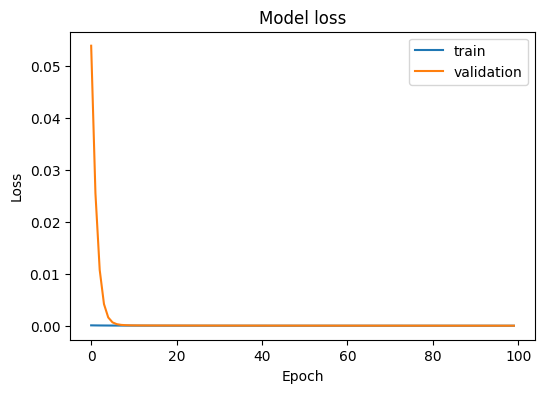

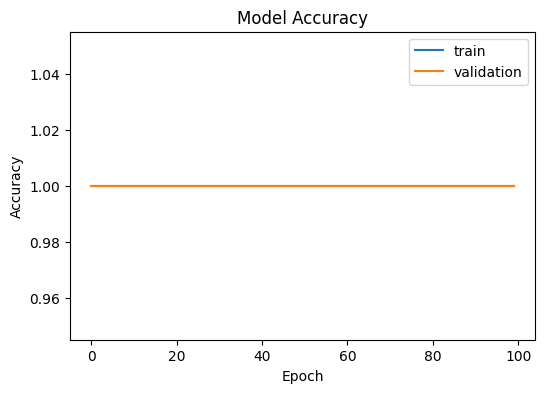

In [ ]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on.
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')